# K-Nearest Neighbors Classifier

### Dataset: Gender Classification
##### Context
Gender is a social construct. The way males and females are treated differently since birth moulds their behaviour and personal preferences into what society expects for their gender.

This small dataset is designed to provide an idea about whether a person's gender can be predicted with an accuracy significantly above 50% based on their personal preferences.

##### Content
The data was collected in Fall 2015 from university students of 21 nationalities studying various majors in various countries using this form:

https://docs.google.com/forms/d/e/1FAIpQLSduEjDURjTh7-a1ZjjlIYx75ScVETLp_gmoFszypz2J7E0LtQ/viewform

The responses were then pre-processed and grouped into categories in order to obtain the final, transformed dataset.

##### Inspiration
With the rise of feminism, the difference between males and females in terms of their personal preferences has decreased in recent years. For instance, historically in many cultures, warm colors such as red and pink were thought of as feminine colors while cool colors such as blue were considered masculine. Today, such ideas are considered outdated.

Despite the decrease in the influence of gender on people’s personal preferences, can a decent gender classifier be built given a dataset with people’s personal preferences? What does this small dataset suggest?

Link : https://www.kaggle.com/hb20007/gender-classification

## Data exploration

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
df = pd.read_csv('/content/dataset.csv')
df.head()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F


In [ ]:
df.describe()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
count,66,66,66,66,66
unique,3,7,6,4,2
top,Cool,Rock,Doesn't drink,Coca Cola/Pepsi,F
freq,37,19,14,32,33


In [ ]:
fav_color = df["Favorite Color"].unique()
fav_music_gend = df["Favorite Music Genre"].unique()
fav_beverage = df["Favorite Beverage"].unique()
fav_soft_drink = df["Favorite Soft Drink"].unique()
gender = df["Gender"].unique()

In [ ]:
print("Favorite colors : \n",fav_color)
print("\nFavorite music genders : \n",fav_music_gend)
print("\nFavorite beverage : \n",fav_beverage)
print("\nFavorite soft drinks : \n",fav_soft_drink)
print("\nGender :\n ",gender)

Favorite colors : 
 ['Cool' 'Neutral' 'Warm']

Favorite music genders : 
 ['Rock' 'Hip hop' 'Folk/Traditional' 'Jazz/Blues' 'Pop' 'Electronic'
 'R&B and soul']

Favorite beverage : 
 ['Vodka' 'Wine' 'Whiskey' "Doesn't drink" 'Beer' 'Other']

Favorite soft drinks : 
 ['7UP/Sprite' 'Coca Cola/Pepsi' 'Fanta' 'Other']

Gender :
  ['F' 'M']


#### - Input data or features :
Favorite colors, Favorite music genders, Favorite beverage, Favorite soft drinks
#### - Output data or class to predict : 
Gender 

## Data preparation
- Step 1 : Make a dictionary for each data feature that contains unique values as keys and index as value, we will use this function everytime we want to and index for a given word from features.
- Step 2 : Using the dictionary made earlier, convert each word in the dataset into one-hot-encoding format based on it's index in the dictionary
- Step 3 : Concatenate features to a single array
- Step 4 : Split data based on a limiter (example 0.7 : 30% for test_data and 70% for train_data)

#### Step 1:

In [ ]:
"""
list2dict : convert a list to a dictionary, this function is useful when using one-hot-encoding  
l : input list
return : dictionary dict
"""
def list2dict(l):
    i = 0
    dict = {}
    for elm in l:
        dict[elm] = i
        i += 1
    return dict

# Create a dictionary for each data type, dictionary keys will be unique values of data types, 
# and values will be from 0 to the the total number of unique values

dfav_color = list2dict(fav_color)
dfav_music_gend = list2dict(fav_music_gend)
dfav_beverage = list2dict(fav_beverage)
dfav_soft_drink = list2dict(fav_soft_drink)
dgender = list2dict(gender)

print("Favorite colors :\n ",dfav_color)
print("\nFavorite music genders :\n ",dfav_music_gend)
print("\nFavorite beverage :\n ",dfav_beverage)
print("\nFavorite soft drinks :\n ",dfav_soft_drink)
print("\nGender :\n ",dgender)

Favorite colors :
  {'Cool': 0, 'Neutral': 1, 'Warm': 2}

Favorite music genders :
  {'Rock': 0, 'Hip hop': 1, 'Folk/Traditional': 2, 'Jazz/Blues': 3, 'Pop': 4, 'Electronic': 5, 'R&B and soul': 6}

Favorite beverage :
  {'Vodka': 0, 'Wine': 1, 'Whiskey': 2, "Doesn't drink": 3, 'Beer': 4, 'Other': 5}

Favorite soft drinks :
  {'7UP/Sprite': 0, 'Coca Cola/Pepsi': 1, 'Fanta': 2, 'Other': 3}

Gender :
  {'F': 0, 'M': 1}


#### Step2, Step3, Step4:

In [ ]:
"""
one_hot_enc : convert a term or a word to a one hot encoding format based on it's dictionary value
term : input term, word or words
dic : dictionary that contain all terms as keys with value for each one
size : size of the one hot encoding vector
return : one hot encoding vector
"""
def one_hot_enc(term, dic, size):
    vect = np.zeros(size)
    v = dic[term]
    vect[v] = 1
    return vect

"""
create_dataset: creates two datasets for training and testing based on a given dataframe and a splitting percentage
df : input dataframe
percentage : splitting percentage
return : train dataset,test dataset
"""

def create_dataset(df,percentage):
    train_data = []
    test_data = []
    n_rows = int(df.shape[0])
    # limiter is used to split data
    limiter = int(n_rows*percentage)
    for i in range(0,n_rows):
        
        # ------------------------ Step 2 ------------------------
        # Load value for each column for row i
        fav_color = df.iloc[i]["Favorite Color"]
        fav_music = df.iloc[i]["Favorite Music Genre"]
        fav_beverage = df.iloc[i]["Favorite Beverage"]
        fav_drink = df.iloc[i]["Favorite Soft Drink"]
        gender = df.iloc[i]["Gender"]

        # One hot encoding
        ohe_color = one_hot_enc(fav_color, dfav_color, 3)
        ohe_music =  one_hot_enc(fav_music, dfav_music_gend, 7)
        ohe_beverage =  one_hot_enc(fav_beverage, dfav_beverage, 6)
        ohe_drink =  one_hot_enc(fav_drink, dfav_soft_drink, 4)
        
        if gender == "F":
            ohe_gender = 0
        else: ohe_gender = 1
        # ------------------------ Step 3 ------------------------
        # Concatenate input data to a one single ndarray
        in_vector = np.concatenate((ohe_color,ohe_music,ohe_beverage,ohe_drink), axis=None)
        
        # ------------------------ Step 4 ------------------------
        # Append input data and output data (class) to training data or testing data
        if(i < limiter):
            train_data.append([in_vector, ohe_gender])
        else:
            test_data.append([in_vector, ohe_gender])
            
    return train_data,test_data

In [ ]:
# Shuffle the dataframe to have shuffled data for testing and training
from sklearn.utils import shuffle
df = shuffle(df)

# Get train and test data
train_data, test_data = create_dataset(df, 0.8)

### K-Nearest Neighbors Class

#### Distance metrics :
- Manhattan Distance: $\sum_{i=1}^{n} |x_i - y_i|$
- Euclidean Distance: $\sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}$ 
- Cosine Distance: $\frac{XY}{|X||Y|}$
- Jaccard Distance: $\frac{|X\cap Y|}{|X|\cup |Y|}$

#### Prediction steps :
- Step 1 : compute distance between an input sample and the rest of the training data
- Step 2 : Distances ascending sort
- Step 3 : Get the K nearest nighbors and vote

In [ ]:
from math import sqrt
from numpy import dot
from numpy.linalg import norm

class KNN:
    
    # Constructor
    def __init__(self, train_data, distance, k):
        self.train_data = train_data
        self.distance = distance
        self.k = k
        self.classes = []
        for train_vector in train_data:
            self.classes.append(train_vector[1])
    
    # Manhattan distance
    def manhattan(self,a, b):
        return sum(abs(val1-val2) for val1, val2 in zip(a,b))
    
    # Euclidian distance
    def euclidian(self,a,b):
        return sqrt(sum((val1-val2)**2 for val1, val2 in zip(a,b)))
    
    # Cosine distance
    def cosine(self,a,b):
        return dot(a, b)/(norm(a)*norm(b))
    
    # Jaccard distance
    def jaccard(self,a, b):
        intersection = len(list(set(a).intersection(b)))
        union = (len(a) + len(b)) - intersection
        return float(intersection) / union
    
    # Prediction function
    def predict(self,sample):
        distances = []
        
        # Step 1 : compute distance between an input sample and the rest of the training data
        for train_vector in self.train_data:
            data = train_vector[0]
            if(self.distance == "manhattan"):
                dist = self.manhattan(sample, data)
                distances.append(dist)
            elif(self.distance == "euclidian"):
                dist = self.euclidian(sample, data)
                distances.append(dist)
            elif(self.distance == "cosine"):
                dist = self.cosine(sample, data)
                distances.append(dist)
            elif(self.distance == "jaccard"):
                dist = self.jaccard(sample, data)
                distances.append(dist)
            else:
                print("Error Prediction : UNKNOWN DISTANCE !")
                
        # Step 2 : Distances ascending sort
        distances, self.classes = zip(*sorted(zip(distances, self.classes)))
        
        # Step 3 : Get the K nearest nighbors and vote
        m = 0
        f = 0
        for ik in range(self.k):
            if self.classes[ik] == 0:
                f += 1
            else:
                m += 1
                
        # return class, prediction probability
        if (m > f):
            return 1,m/self.k
        else:
            return 0,f/self.k

## Training
With KNN we don't have parameter optimization like ANN, we just store the vectorized data and compute distance and vote to predict a class for a given sample.

In [ ]:
classifier = KNN(train_data, "euclidian", k = 5)

## Test

In [ ]:
# Ground truth classes list
gt = []

# Predicted classes list
predictions = []

# Predict the class of each sample in the testing dataset
for x in range(len(test_data)):
    gt.append(test_data[x][1])
    cls, prb = classifier.predict(test_data[x][0])
    predictions.append(cls)


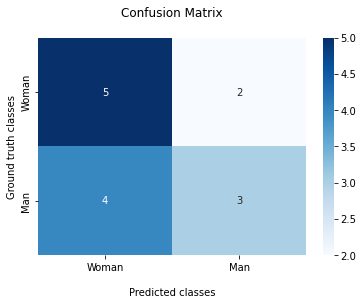

In [ ]:
# Compute confusion matrix values
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(gt, predictions)

# Plot confusion matrix
import seaborn as sns
from matplotlib import pyplot as plt

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix\n');
ax.set_xlabel('\nPredicted classes')
ax.set_ylabel('Ground truth classes');
ax.xaxis.set_ticklabels(['Woman','Man'])
ax.yaxis.set_ticklabels(['Woman','Man'])
plt.show()


In [ ]:
# Compute accuracy = (TP+TN)/(TP+FP+FN+TN)
accuracy = (cf_matrix[0][0]+cf_matrix[1][1])/(cf_matrix[0][0]+cf_matrix[0][1]+cf_matrix[1][0]+cf_matrix[1][1])
print("Accuracy = ", accuracy)

Accuracy =  0.5714285714285714


## K-NN parameters selection
###### Parameters : (Distance,K)

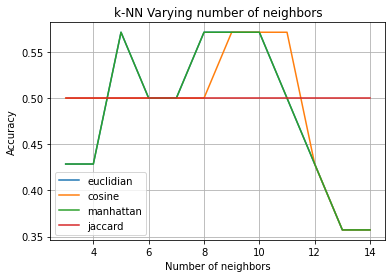

In [ ]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

distances = ["euclidian", "manhattan", "cosine", "jaccard"]
distances_preds={}

k_n = np.arange(3,15)
for d in range(len(distances)):
    k_predictions = []
    for k in k_n:
        classifier = KNN(train_data, distances[d], k)
        predictions = []
        for x in range(len(test_data)):
            cls, prb = classifier.predict(test_data[x][0])
            predictions.append(cls)
        k_predictions.append(predictions)
    distances_preds[distances[d]] = k_predictions


from sklearn.metrics import accuracy_score

distances_acc={}

for distance in distances_preds:
    acc = []
    for pred in distances_preds[distance]:
        acc.append(accuracy_score(gt, pred, normalize=True))
    distances_acc[distance] = acc

plt.title('k-NN Varying number of neighbors')
plt.plot(k_n, distances_acc["euclidian"], label='euclidian')
plt.plot(k_n, distances_acc["cosine"], label="cosine")
plt.plot(k_n, distances_acc["manhattan"], label="manhattan")
plt.plot(k_n, distances_acc["jaccard"], label="jaccard")
plt.legend()
plt.grid()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

#### Note : The prediction may vary from one execution to another and that is due dataset random shuffle !